In [152]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from datetime import timedelta

In [20]:
from config import severityDict
data = pd.read_csv("data/TESGwithout0.csv")
data['company_id'] = data['company_id'].apply(lambda x: str(x))
data['severity'] = data['severity'].apply(lambda x: severityDict[x])
data['publication_date'] = pd.to_datetime(data['publication_date'])
data['issue_main'] = data['issue_main'].apply(lambda x: x[:1])
data

,company_id,company_name,SASB,publication_date,issue_main,severity,reach,novelty
0,1101,台泥,提煉與礦產加工,2018-01-31,E,3,1,2
1,1101,台泥,提煉與礦產加工,2018-02-28,E,1,1,2
2,1101,台泥,提煉與礦產加工,2018-03-31,E,1,1,2
3,1101,台泥,提煉與礦產加工,2018-05-31,E,1,1,2
4,1101,台泥,提煉與礦產加工,2018-06-30,E,3,1,2
...,...,...,...,...,...,...,...,...
19635,9986,南天有線,服務,2020-06-17,G,1,1,2
19636,9986,南天有線,服務,2020-08-13,G,3,1,2
19637,9986,南天有線,服務,2021-04-22,G,3,1,2
19638,9986,南天有線,服務,2021-08-12,G,3,1,2


In [21]:
rri = pd.read_csv("output/rri.csv", parse_dates=True, index_col=0)
rri.company_id.unique()

array([1101, 1102, 1103, ..., 9984, 9985, 9986])

In [22]:
print("共有：", len(data.company_id.unique()), "家公司")

共有： 2167 家公司


In [23]:
print("共有：", len(rri.company_id.unique()), "家公司")

共有： 2167 家公司


# test case: 
- 1107 只有 E
- 1110 只有 E, S

最後一筆數據，再往後 730 天補上全為 0

In [392]:
data = pd.read_csv("data/TESGwithout0.csv")
data['company_id'] = data['company_id'].apply(lambda x: str(x))
data['severity'] = data['severity'].apply(lambda x: severityDict[x])
data['publication_date'] = pd.to_datetime(data['publication_date'])
data['issue_main'] = data['issue_main'].apply(lambda x: x[:1])

In [393]:
rri = pd.read_csv("output/rri.csv", parse_dates=True, index_col=0)
rri.date = pd.to_datetime(rri.date)
rri.set_index('date', inplace=True)
rri['company_id'] = rri['company_id'].apply(lambda x: str(x))

In [426]:
comp_id = '1102'

In [427]:
# 載入公司資料
comp_data = data[data['company_id']==comp_id].copy()
comp_rri = rri[rri['company_id']==comp_id].copy()

if comp_rri.empty: 
    print(f"{comp_id} 無 rri 資料")
if comp_data.empty: 
    print(f"{comp_id} 無 esg 資料")

In [428]:
comp_data

,company_id,company_name,SASB,publication_date,issue_main,severity,reach,novelty
39,1102,亞泥,提煉與礦產加工,2018-03-31,E,2,1,2
40,1102,亞泥,提煉與礦產加工,2018-04-30,S,2,1,2
41,1102,亞泥,提煉與礦產加工,2018-05-31,S,3,1,2
42,1102,亞泥,提煉與礦產加工,2018-06-30,E,1,1,2
43,1102,亞泥,提煉與礦產加工,2018-06-30,S,1,1,2
44,1102,亞泥,提煉與礦產加工,2018-08-31,S,2,1,2
45,1102,亞泥,提煉與礦產加工,2018-09-30,S,1,1,2
46,1102,亞泥,提煉與礦產加工,2018-11-30,E,2,1,2
47,1102,亞泥,提煉與礦產加工,2019-01-31,S,1,1,2
48,1102,亞泥,提煉與礦產加工,2019-02-28,S,1,1,2


In [429]:
comp_rri

,company_id,company_name,SASB,avg_incident_value,intensity,RRI,peak_2y,trend_30d
date,,,,,,,,
2018-03-31,1102,亞泥,提煉與礦產加工,1.000000,0.7,70.000000,70.000000,NaN
2018-04-01,1102,亞泥,提煉與礦產加工,1.000000,0.7,70.000000,70.000000,NaN
2018-04-02,1102,亞泥,提煉與礦產加工,1.000000,0.7,70.000000,70.000000,NaN
2018-04-03,1102,亞泥,提煉與礦產加工,1.000000,0.7,70.000000,70.000000,NaN
2018-04-04,1102,亞泥,提煉與礦產加工,1.000000,0.7,70.000000,70.000000,NaN
...,...,...,...,...,...,...,...,...
2023-01-27,1102,亞泥,提煉與礦產加工,0.866148,0.7,19.138359,71.793289,1.368613
2023-01-28,1102,亞泥,提煉與礦產加工,0.866148,0.7,19.092738,71.793289,1.368613
2023-01-29,1102,亞泥,提煉與礦產加工,0.866148,0.7,19.047118,71.793289,1.368613


In [430]:
comp_data.rename(columns={'publication_date': 'date'}, inplace=True)
comp_data.set_index('date', inplace=True)
comp_data

,company_id,company_name,SASB,issue_main,severity,reach,novelty
date,,,,,,,
2018-03-31,1102,亞泥,提煉與礦產加工,E,2,1,2
2018-04-30,1102,亞泥,提煉與礦產加工,S,2,1,2
2018-05-31,1102,亞泥,提煉與礦產加工,S,3,1,2
2018-06-30,1102,亞泥,提煉與礦產加工,E,1,1,2
2018-06-30,1102,亞泥,提煉與礦產加工,S,1,1,2
2018-08-31,1102,亞泥,提煉與礦產加工,S,2,1,2
2018-09-30,1102,亞泥,提煉與礦產加工,S,1,1,2
2018-11-30,1102,亞泥,提煉與礦產加工,E,2,1,2
2019-01-31,1102,亞泥,提煉與礦產加工,S,1,1,2


In [431]:
# 製作 730 天後，ESG 皆為 0 的資料
lastday = comp_data.index[-1] + timedelta(days=730)
lastinfo = comp_data.tail(1).values[0][:3].tolist()

In [432]:
for i in ['E', 'S', 'G']:
    df0 = pd.DataFrame([lastinfo + [str(i)] + [0,1,2]],
                        columns=comp_data.columns.tolist(), 
                        index=[lastday])
    comp_data = pd.concat([comp_data, df0], axis=0)
    
comp_data.index.name = 'date'
comp_data

,company_id,company_name,SASB,issue_main,severity,reach,novelty
date,,,,,,,
2018-03-31,1102,亞泥,提煉與礦產加工,E,2,1,2
2018-04-30,1102,亞泥,提煉與礦產加工,S,2,1,2
2018-05-31,1102,亞泥,提煉與礦產加工,S,3,1,2
2018-06-30,1102,亞泥,提煉與礦產加工,E,1,1,2
2018-06-30,1102,亞泥,提煉與礦產加工,S,1,1,2
2018-08-31,1102,亞泥,提煉與礦產加工,S,2,1,2
2018-09-30,1102,亞泥,提煉與礦產加工,S,1,1,2
2018-11-30,1102,亞泥,提煉與礦產加工,E,2,1,2
2019-01-31,1102,亞泥,提煉與礦產加工,S,1,1,2


In [433]:
# 往前 730 天疊加
esgcomp = comp_data.pivot_table(index='date', columns='issue_main', aggfunc='sum', fill_value=0)['severity']
esgcomp

issue_main,E,G,S
date,,,
2018-03-31,2,0,0
2018-04-30,0,0,2
2018-05-31,0,0,3
2018-06-30,1,0,1
2018-08-31,0,0,2
2018-09-30,0,0,1
2018-11-30,2,0,0
2019-01-31,0,0,1
2019-02-28,0,0,1


In [435]:
# 如果 esg 最後一天日期 > rri 則不變。如果小於的話要補上 rri 最後一天
if esgcomp.tail(1).index < comp_rri.tail(1).index:
    esgcomp.loc[comp_rri.tail(1).index[0]] = [0,0,0]

esgcomp

issue_main,E,G,S
date,,,
2018-03-31,2,0,0
2018-04-30,0,0,2
2018-05-31,0,0,3
2018-06-30,1,0,1
2018-08-31,0,0,2
2018-09-30,0,0,1
2018-11-30,2,0,0
2019-01-31,0,0,1
2019-02-28,0,0,1


In [436]:
esgcomp = esgcomp.rolling('730D', min_periods=1).sum().asfreq('d').ffill()
esgcols = ['E', 'S', 'G']
esgcomp = esgcomp[esgcols]
esgcomp

issue_main,E,S,G
date,,,
2018-03-31,2.0,0.0,0.0
2018-04-01,2.0,0.0,0.0
2018-04-02,2.0,0.0,0.0
2018-04-03,2.0,0.0,0.0
2018-04-04,2.0,0.0,0.0
...,...,...,...
2024-06-08,6.0,1.0,16.0
2024-06-09,6.0,1.0,16.0
2024-06-10,6.0,1.0,16.0


In [437]:
# 計算權重
cols = ['weight_E', 'weight_S', 'weight_G']
weight = pd.DataFrame([esgcomp[col] / esgcomp.sum(axis=1) for col in esgcomp], index=cols).T
weight = weight.fillna(0)
weight

,weight_E,weight_S,weight_G
date,,,
2018-03-31,1.00000,0.000000,0.000000
2018-04-01,1.00000,0.000000,0.000000
2018-04-02,1.00000,0.000000,0.000000
2018-04-03,1.00000,0.000000,0.000000
2018-04-04,1.00000,0.000000,0.000000
...,...,...,...
2024-06-08,0.26087,0.043478,0.695652
2024-06-09,0.26087,0.043478,0.695652
2024-06-10,0.26087,0.043478,0.695652


In [440]:
# 合併 rri
component = pd.merge(comp_rri, weight, left_index=True, right_index=True)
component = component.assign(RRI_E=lambda x: x['RRI'] * x['weight_E'],
                RRI_S=lambda x: x['RRI'] * x['weight_S'],
                RRI_G=lambda x: x['RRI'] * x['weight_G'])
component

,company_id,company_name,SASB,avg_incident_value,intensity,RRI,peak_2y,trend_30d,weight_E,weight_S,weight_G,RRI_E,RRI_S,RRI_G
date,,,,,,,,,,,,,,
2018-03-31,1102,亞泥,提煉與礦產加工,1.000000,0.7,70.000000,70.000000,NaN,1.00000,0.000000,0.000000,70.000000,0.000000,0.000000
2018-04-01,1102,亞泥,提煉與礦產加工,1.000000,0.7,70.000000,70.000000,NaN,1.00000,0.000000,0.000000,70.000000,0.000000,0.000000
2018-04-02,1102,亞泥,提煉與礦產加工,1.000000,0.7,70.000000,70.000000,NaN,1.00000,0.000000,0.000000,70.000000,0.000000,0.000000
2018-04-03,1102,亞泥,提煉與礦產加工,1.000000,0.7,70.000000,70.000000,NaN,1.00000,0.000000,0.000000,70.000000,0.000000,0.000000
2018-04-04,1102,亞泥,提煉與礦產加工,1.000000,0.7,70.000000,70.000000,NaN,1.00000,0.000000,0.000000,70.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-27,1102,亞泥,提煉與礦產加工,0.866148,0.7,19.138359,71.793289,1.368613,0.26087,0.043478,0.695652,4.992615,0.832103,13.313641
2023-01-28,1102,亞泥,提煉與礦產加工,0.866148,0.7,19.092738,71.793289,1.368613,0.26087,0.043478,0.695652,4.980714,0.830119,13.281905
2023-01-29,1102,亞泥,提煉與礦產加工,0.866148,0.7,19.047118,71.793289,1.368613,0.26087,0.043478,0.695652,4.968813,0.828136,13.250169


In [442]:
component = pd.merge(component, esgcomp, left_index=True, right_index=True)


<AxesSubplot: xlabel='date'>

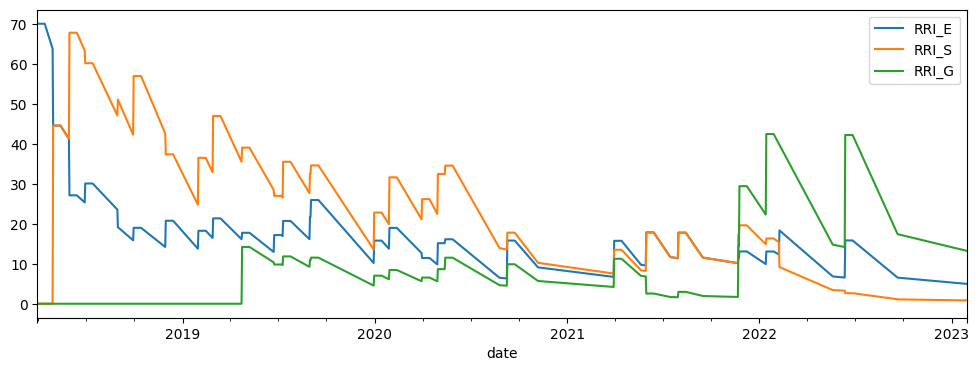

In [443]:
component[['RRI_E', 'RRI_S', 'RRI_G']].plot(figsize=(12,4))

# Calculating All companies

In [446]:
data = pd.read_csv("data/TESGwithout0.csv")
data['company_id'] = data['company_id'].apply(lambda x: str(x))
data['severity'] = data['severity'].apply(lambda x: severityDict[x])
data['publication_date'] = pd.to_datetime(data['publication_date'])
data['issue_main'] = data['issue_main'].apply(lambda x: x[:1])


In [447]:
rri = pd.read_csv("output/rri.csv", parse_dates=True, index_col=0)
rri.date = pd.to_datetime(rri.date)
rri.set_index('date', inplace=True)
rri['company_id'] = rri['company_id'].apply(lambda x: str(x))

In [448]:
ESG = pd.DataFrame()

for comp_id in tqdm(data['company_id'].unique()):
    # 載入公司資料
    comp_data = data[data['company_id']==comp_id].copy()
    comp_rri = rri[rri['company_id']==comp_id].copy()
    if comp_data.empty: 
        print(f"{comp_id} 無資料")
        continue
    comp_data.rename(columns={'publication_date': 'date'}, inplace=True)
    comp_data.set_index('date', inplace=True)
    
    # 製作 730 天後，ESG 皆為 0 的資料
    lastday = comp_data.index[-1] + timedelta(days=730)
    lastinfo = comp_data.tail(1).values[0][:3].tolist()

    for i in ['E', 'S', 'G']:
        df0 = pd.DataFrame([lastinfo + [str(i)] + [0,1,2]],
                            columns=comp_data.columns.tolist(), 
                            index=[lastday])
        comp_data = pd.concat([comp_data, df0], axis=0)

    comp_data.index.name = 'date'

    # 往前 730 天疊加
    esgcomp = comp_data.pivot_table(index='date', columns='issue_main', aggfunc='sum', fill_value=0)['severity']

    # 如果 esg 最後一天日期 > rri 則不變。如果小於的話要補上 rri 最後一天
    if esgcomp.tail(1).index < comp_rri.tail(1).index:
        esgcomp.loc[comp_rri.tail(1).index[0]] = [0,0,0]

    esgcomp = esgcomp.rolling('730D', min_periods=1).sum().asfreq('d').ffill()
    esgcols = ['E', 'S', 'G']
    esgcomp = esgcomp[esgcols]

    # 計算權重
    cols = ['weight_E', 'weight_S', 'weight_G']
    weight = pd.DataFrame([esgcomp[col] / esgcomp.sum(axis=1) for col in esgcomp], index=cols).T
    weight = weight.fillna(0)

    # 合併 rri
    component = pd.merge(comp_rri, weight, left_index=True, right_index=True)
    component = component.assign(RRI_E=lambda x: x['RRI'] * x['weight_E'],
                 RRI_S=lambda x: x['RRI'] * x['weight_S'],
                 RRI_G=lambda x: x['RRI'] * x['weight_G'])
    component = pd.merge(component, esgcomp, left_index=True, right_index=True)
    ESG = pd.concat([ESG, component])
    

ESG = ESG[['company_id', 'company_name', 'SASB', 'E', 'S', 'G', 'weight_E', 'weight_S', 'weight_G', 'RRI_E', 'RRI_S', 'RRI_G', 'RRI']]
ESG.reset_index().rename(columns={ESG.index.name:'date'})

100%|██████████| 2167/2167 [09:30<00:00,  3.80it/s]


,date,company_id,company_name,SASB,E,S,G,weight_E,weight_S,weight_G,RRI_E,RRI_S,RRI_G,RRI
0,2018-01-31,1101,台泥,提煉與礦產加工,3.0,0.0,0.0,1.000000,0.0,0.000000,85.732141,0.0,0.000000,85.732141
1,2018-02-01,1101,台泥,提煉與礦產加工,3.0,0.0,0.0,1.000000,0.0,0.000000,85.732141,0.0,0.000000,85.732141
2,2018-02-02,1101,台泥,提煉與礦產加工,3.0,0.0,0.0,1.000000,0.0,0.000000,85.732141,0.0,0.000000,85.732141
3,2018-02-03,1101,台泥,提煉與礦產加工,3.0,0.0,0.0,1.000000,0.0,0.000000,85.732141,0.0,0.000000,85.732141
4,2018-02-04,1101,台泥,提煉與礦產加工,3.0,0.0,0.0,1.000000,0.0,0.000000,85.732141,0.0,0.000000,85.732141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3080338,2023-01-27,9986,南天有線,服務,1.0,0.0,11.0,0.083333,0.0,0.916667,0.896217,0.0,9.858382,10.754598
3080339,2023-01-28,9986,南天有線,服務,1.0,0.0,11.0,0.083333,0.0,0.916667,0.892415,0.0,9.816563,10.708978
3080340,2023-01-29,9986,南天有線,服務,1.0,0.0,11.0,0.083333,0.0,0.916667,0.888613,0.0,9.774744,10.663357
3080341,2023-01-30,9986,南天有線,服務,1.0,0.0,11.0,0.083333,0.0,0.916667,0.884811,0.0,9.732925,10.617737


In [452]:
len(rri.company_id.unique())

2167

In [450]:
len(data.company_id.unique())

2167

In [449]:
len(ESG.company_id.unique())

2167

In [453]:
import plotly.express as px
ESGcomp = ESG[ESG['company_id']==comp_id]
ESGcomp = ESGcomp[['RRI_E','RRI_S','RRI_G']]
px.bar(ESGcomp, y=['RRI_E','RRI_S','RRI_G'], title=str(comp_id))

In [454]:
ESG.to_csv('output/RRI_ESG.csv', encoding='utf_8_sig')

In [455]:
pd.read_csv("output/RRI_ESG.csv")

,date,company_id,company_name,SASB,E,S,G,weight_E,weight_S,weight_G,RRI_E,RRI_S,RRI_G,RRI
0,2018-01-31,1101,台泥,提煉與礦產加工,3.0,0.0,0.0,1.000000,0.0,0.000000,85.732141,0.0,0.000000,85.732141
1,2018-02-01,1101,台泥,提煉與礦產加工,3.0,0.0,0.0,1.000000,0.0,0.000000,85.732141,0.0,0.000000,85.732141
2,2018-02-02,1101,台泥,提煉與礦產加工,3.0,0.0,0.0,1.000000,0.0,0.000000,85.732141,0.0,0.000000,85.732141
3,2018-02-03,1101,台泥,提煉與礦產加工,3.0,0.0,0.0,1.000000,0.0,0.000000,85.732141,0.0,0.000000,85.732141
4,2018-02-04,1101,台泥,提煉與礦產加工,3.0,0.0,0.0,1.000000,0.0,0.000000,85.732141,0.0,0.000000,85.732141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3080338,2023-01-27,9986,南天有線,服務,1.0,0.0,11.0,0.083333,0.0,0.916667,0.896217,0.0,9.858382,10.754598
3080339,2023-01-28,9986,南天有線,服務,1.0,0.0,11.0,0.083333,0.0,0.916667,0.892415,0.0,9.816563,10.708978
3080340,2023-01-29,9986,南天有線,服務,1.0,0.0,11.0,0.083333,0.0,0.916667,0.888613,0.0,9.774744,10.663357
3080341,2023-01-30,9986,南天有線,服務,1.0,0.0,11.0,0.083333,0.0,0.916667,0.884811,0.0,9.732925,10.617737
